In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import Image
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
# import cleaned data
df = pd.read_csv('../data/average_station_traffic.csv')
del df['Unnamed: 0']

In [6]:
# import station zip codes
df_zips = pd.read_csv("turnstile_zips.csv")
df_zips.rename(columns={'Station': 'STATION'}, inplace=True)

In [7]:
# create short day/time for axis
df['Short_Day'] = df.apply(lambda x: x['Day'][:3], axis=1)
df['Short_Time'] = df.apply(
    lambda x: x['Time_Range'][:2] + ' to ' + x['Time_Range'][9:11], axis=1)
df['Short_Time_Range'] = df.apply(
    lambda x: x['Short_Day'] + "  " + x['Short_Time'], axis=1)

In [8]:
# merge zip codes & stations
df_merge_zip = df.merge(df_zips, on='STATION')

In [9]:
# top 10/20 income data zip codes - from Jit's data
top_10_zips = [10282, 10007, 10069, 10162,
               10004, 10280, 11109, 10022, 10005, 10021]
top_20_zips = [10282, 10007, 10069, 10162, 10004, 10280, 11109, 10022, 10005, 10021,
               10023, 10017, 10065, 10014, 10075, 10024, 10006, 10011, 10028, 10010]

# filter for zipcodes in top 10
t10_df = df_merge_zip[df_merge_zip['zipcodes'].isin(top_10_zips)].reset_index()

In [10]:
# ID top 10 stations in this subset
seriesname = t10_df.groupby(['Day', 'Time_Range'])['Total_Traffic'].idxmax()
best_locs_df = t10_df.iloc[seriesname].copy()

In [11]:
#categorize and sort
day_list = ['Sunday', 'Monday', 'Tuesday',
            'Wednesday', 'Thursday', 'Friday', 'Saturday']
time_range_list = ['00:00 to 04:00', '04:00 to 08:00',
                   '08:00 to 12:00', '12:00 to 16:00',
                   '16:00 to 20:00', '20:00 to 00:00']

best_locs_df['Day'] = pd.Categorical(
    best_locs_df['Day'], categories=day_list, ordered=True)
best_locs_df['Time_Range'] = pd.Categorical(
    best_locs_df['Time_Range'], categories=time_range_list, ordered=True)

best_locs_df = best_locs_df.sort_values(['Day', 'Time_Range']).reset_index()
best_locs_df = best_locs_df.sort_index()

best_locs_df['Day_Range'] = best_locs_df.apply(
    lambda x: x['Day'] + " " + x['Time_Range'], axis=1)

In [12]:
# create list of best stations
best_stat_list = best_locs_df.groupby(['STATION']).count().reset_index()
best_stat_list = best_stat_list.STATION.tolist()

In [13]:
# get colors for each station name (has to be <6 unless you use a different palette)
current_palette = sns.color_palette('deep')[:len(best_stat_list)]

In [14]:
d_st_clr = {}

for i in range(len(best_stat_list)):
    d_st_clr[best_stat_list[i]] = current_palette[i]

In [15]:
best_locs_df['color'] = best_locs_df["STATION"].map(d_st_clr)

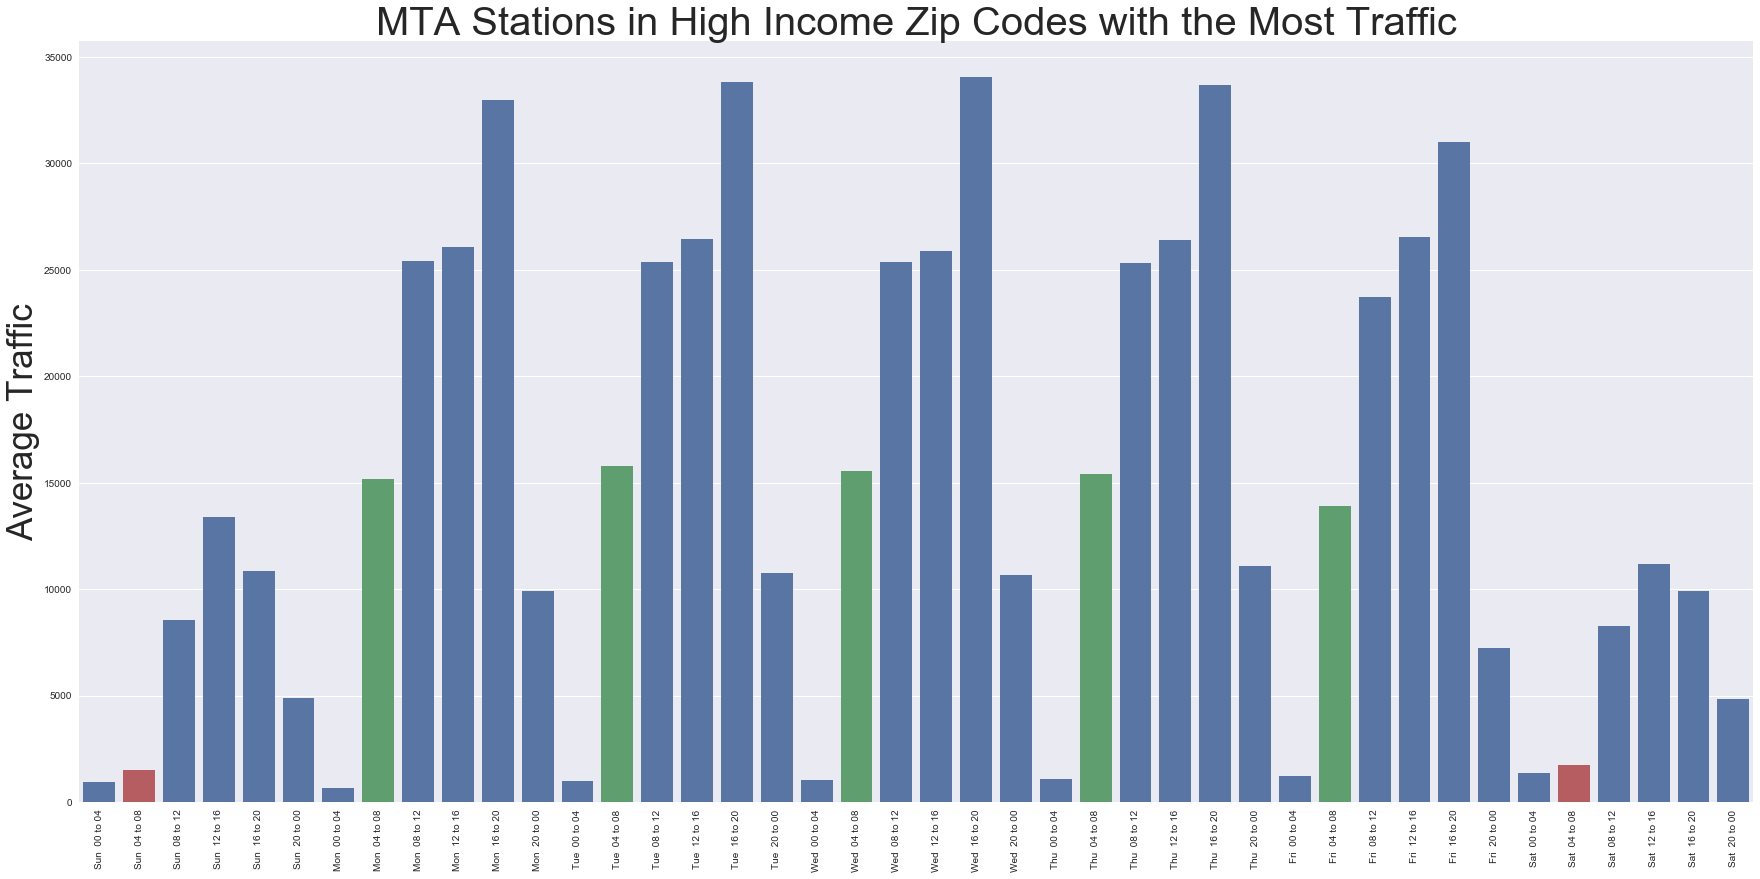

In [16]:
# plot it!
fig, ax = plt.subplots()
fig.set_size_inches(30, 14)
sns.set(font_scale=2)

fig = sns.barplot(x=best_locs_df['Short_Time_Range'],
                  y=best_locs_df['Total_Traffic'],
                  palette=best_locs_df['color'])

fig.set_title("MTA Stations in High Income Zip Codes with the Most Traffic",
              fontsize=40)
ax.set_xticklabels(best_locs_df['Short_Time_Range'], rotation=90)
ax.set_xlabel('', fontsize=35)
ax.set_ylabel('Average Traffic', fontsize=35)